### 파일 불러오기

In [1]:
import pandas as pd

pd.set_option('display.max.colwidth', 100)

In [2]:
dfm = pd.read_excel('dfm.xlsx')
dfm = dfm[:12]
dfm

,Title,Date,Link,opening_price,closing_price,shift(%),average
0,5월 17일(수) 업데이트 내역 안내 (내용추가),2023-05-17,https://lostark.game.onstove.com/News/Notice/Views/2405,2930.0,2999.0,2.35,2965.0
1,5월 24일(수) 업데이트 내역 안내,2023-05-24,https://lostark.game.onstove.com/News/Notice/Views/2412,2999.0,2890.0,-3.63,2945.0
2,5월 31일(수) 업데이트 내역 안내,2023-05-31,https://lostark.game.onstove.com/News/Notice/Views/2419,2840.0,2801.0,-1.37,2821.0
3,6월 7일(수) 업데이트 내역 안내,2023-06-07,https://lostark.game.onstove.com/News/Notice/Views/2430,2779.0,2949.0,6.12,2864.0
4,2023 여름 업데이트 시 일부 시스템 변경사항 사전 안내 (내용수정),2023-06-14,https://lostark.game.onstove.com/News/Notice/Views/2437,2949.0,2999.0,1.70,2974.0
5,6월 21일(수) 로스트아크 정기 점검 완료 안내,2023-06-21,https://lostark.game.onstove.com/News/Notice/Views/2441,2999.0,2955.0,-1.47,2977.0
6,6월 28일(수) 업데이트 내역 안내 (7/1 내용 수정),2023-06-28,https://lostark.game.onstove.com/News/Notice/Views/2452,2980.0,2801.0,-6.01,2891.0
7,7월 5일(수) 업데이트 내역 안내 (내용수정),2023-07-05,https://lostark.game.onstove.com/News/Notice/Views/2461,2801.0,2945.0,5.14,2873.0
8,7월 12일(수) 업데이트 내역 안내,2023-07-12,https://lostark.game.onstove.com/News/Notice/Views/2465,2945.0,3540.0,20.20,3243.0
9,7월 19일(수) 업데이트 내역 안내 (내용추가),2023-07-19,https://lostark.game.onstove.com/News/Notice/Views/2475,3544.0,3410.0,-3.78,3477.0


In [3]:
dfm0809 = pd.read_excel('dfm.xlsx')[12:]
dfm0809

,Title,Date,Link,opening_price,closing_price,shift(%),average
12,8월 9일(수) 업데이트 내역 안내,2023-08-09,https://lostark.game.onstove.com/News/Notice/Views/2497,NaN,NaN,NaN,NaN


### 업데이트 내역 저장

In [5]:
from bs4 import BeautifulSoup
import requests

In [6]:
for idx in dfm.index:
    response = requests.get(dfm.loc[idx, 'Link'], headers={'accept':'application/json'})
    soup = BeautifulSoup(response.text, 'html.parser')
    texts = soup.find('div', class_='fr-view').get_text()

    with open('./update_history/' + str(dfm.loc[idx, 'Date'])[5:10] + '.txt', 'w') as file:
        file.write(texts)

In [7]:
hist_lists = [str(dfm.loc[idx, 'Date'])[5:10] for idx in dfm.index]
print(hist_lists)

['05-17', '05-24', '05-31', '06-07', '06-14', '06-21', '06-28', '07-05', '07-12', '07-19', '07-26', '08-02']


### 업데이트 내역 주요 단어 시각화

In [23]:
from konlpy.tag import Okt
from collections import Counter

import csv

from wordcloud import WordCloud
from IPython.display import display as dsp, Image as idImg
from PIL import Image as pImg
import matplotlib.pyplot as plt

okt = Okt()

In [19]:
def txt2csv(file_path):
    with open(file_path + '.txt', 'r', encoding='utf-8') as file: # file_path = './update_history/' + dates
        f = file.read()

        noun = okt.nouns(f) # 명사 찾기
        for idx, word in enumerate(noun): # 한 글자 단어 제거
            if len(word) < 2:
                noun.pop(idx)

        count = Counter(noun) # 단어별 빈도수 계산
        noun_list = count.most_common(100) # 상위 100개만 저장


        with open(file_path + '.csv', 'w', newline='\n', encoding='euc-kr') as file2: # utf-8로 저장하면 한글 깨짐
            csvwrite = csv.writer(file2, delimiter=',') # 구분자 , 로 지정
            for v in noun_list:
                csvwrite.writerow(v)

    return file_path + '.csv'

In [15]:
def csv2list(csv_file_path):
    noun_list = []  # 결과를 저장할 리스트

    with open(csv_file_path, 'r', newline='\n', encoding='euc-kr') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')  # 탭으로 구분된 CSV 파일의 경우
        
        for row in reader:
            text = row[0]  # 텍스트 부분
            number = int(row[1])  # 숫자 부분 (정수로 변환)
            noun_list.append((text, number))  # 튜플 형태로 리스트에 추가

    return noun_list


In [16]:
def wc_gen(file_path, noun_list, \
        font_path = 'C:\\WINDOWS\\Fonts\\MALGUN.TTF', width=500, height=500, max_words=100, max_font_size=200):
        
        wc = WordCloud(font_path=font_path, background_color='white', \
                width=width, height=height, max_words=max_words, max_font_size=max_font_size) # WordCloud 설정
        
        wc.generate_from_frequencies(dict(noun_list)) # noun_list 기반 wc 이미지 생성
        wc_path = file_path + '.png'
        wc.to_file(wc_path) # wc.png 저장

        return wc_path

# dsp(Image(filename=wc_path))


In [21]:
for hist in hist_lists:
    fp = txt2csv('./update_history/' + hist)
    print(fp)
    nl = csv2list(fp)
    print(nl)
    wcp = wc_gen('./update_history/' + hist, nl)
    print(wcp, '\n')

./update_history/05-17.csv
[('변경', 488), ('증가', 363), ('스킬', 288), ('피해', 285), ('포드', 285), ('효과', 206), ('기존', 195), ('공격', 192), ('게이지', 119), ('피해량', 115), ('다음', 113), ('개선', 109), ('적중', 96), ('추가', 94), ('감소', 93), ('수정', 92), ('적용', 85), ('사용', 77), ('듀얼', 71), ('현상', 71), ('시간', 63), ('트', 58), ('최대', 58), ('이펙트', 58), ('이동', 55), ('치명', 55), ('사격', 52), ('적', 51), ('상태', 50), ('출력', 46), ('아이템', 44), ('각인', 43), ('타격', 42), ('속도', 39), ('이후', 38), ('단계', 37), ('경우', 36), ('이상', 36), ('회복', 36), ('퀘스트', 36), ('진행', 35), ('재사용', 35), ('획득량', 35), ('스탠스', 35), ('클래스', 34), ('잠식', 33), ('전투', 32), ('조정', 32), ('해당', 32), ('기공사', 31), ('발생', 30), ('일부', 28), ('아래', 26), ('소모', 26), ('홀딩', 26), ('캐릭터', 26), ('횟수', 26), ('전방', 25), ('의뢰', 25), ('획득', 24), ('차지', 24), ('완료', 24), ('퍼펙트', 24), ('대상', 24), ('호크', 24), ('헌터', 23), ('범위', 23), ('피격', 23), ('즉시', 23), ('데빌', 22), ('거리', 22), ('마지막', 22), ('영지', 22), ('시전', 21), ('강화', 21), ('기본', 21), ('판단', 20), ('준비', 20), ('보유', 20), (

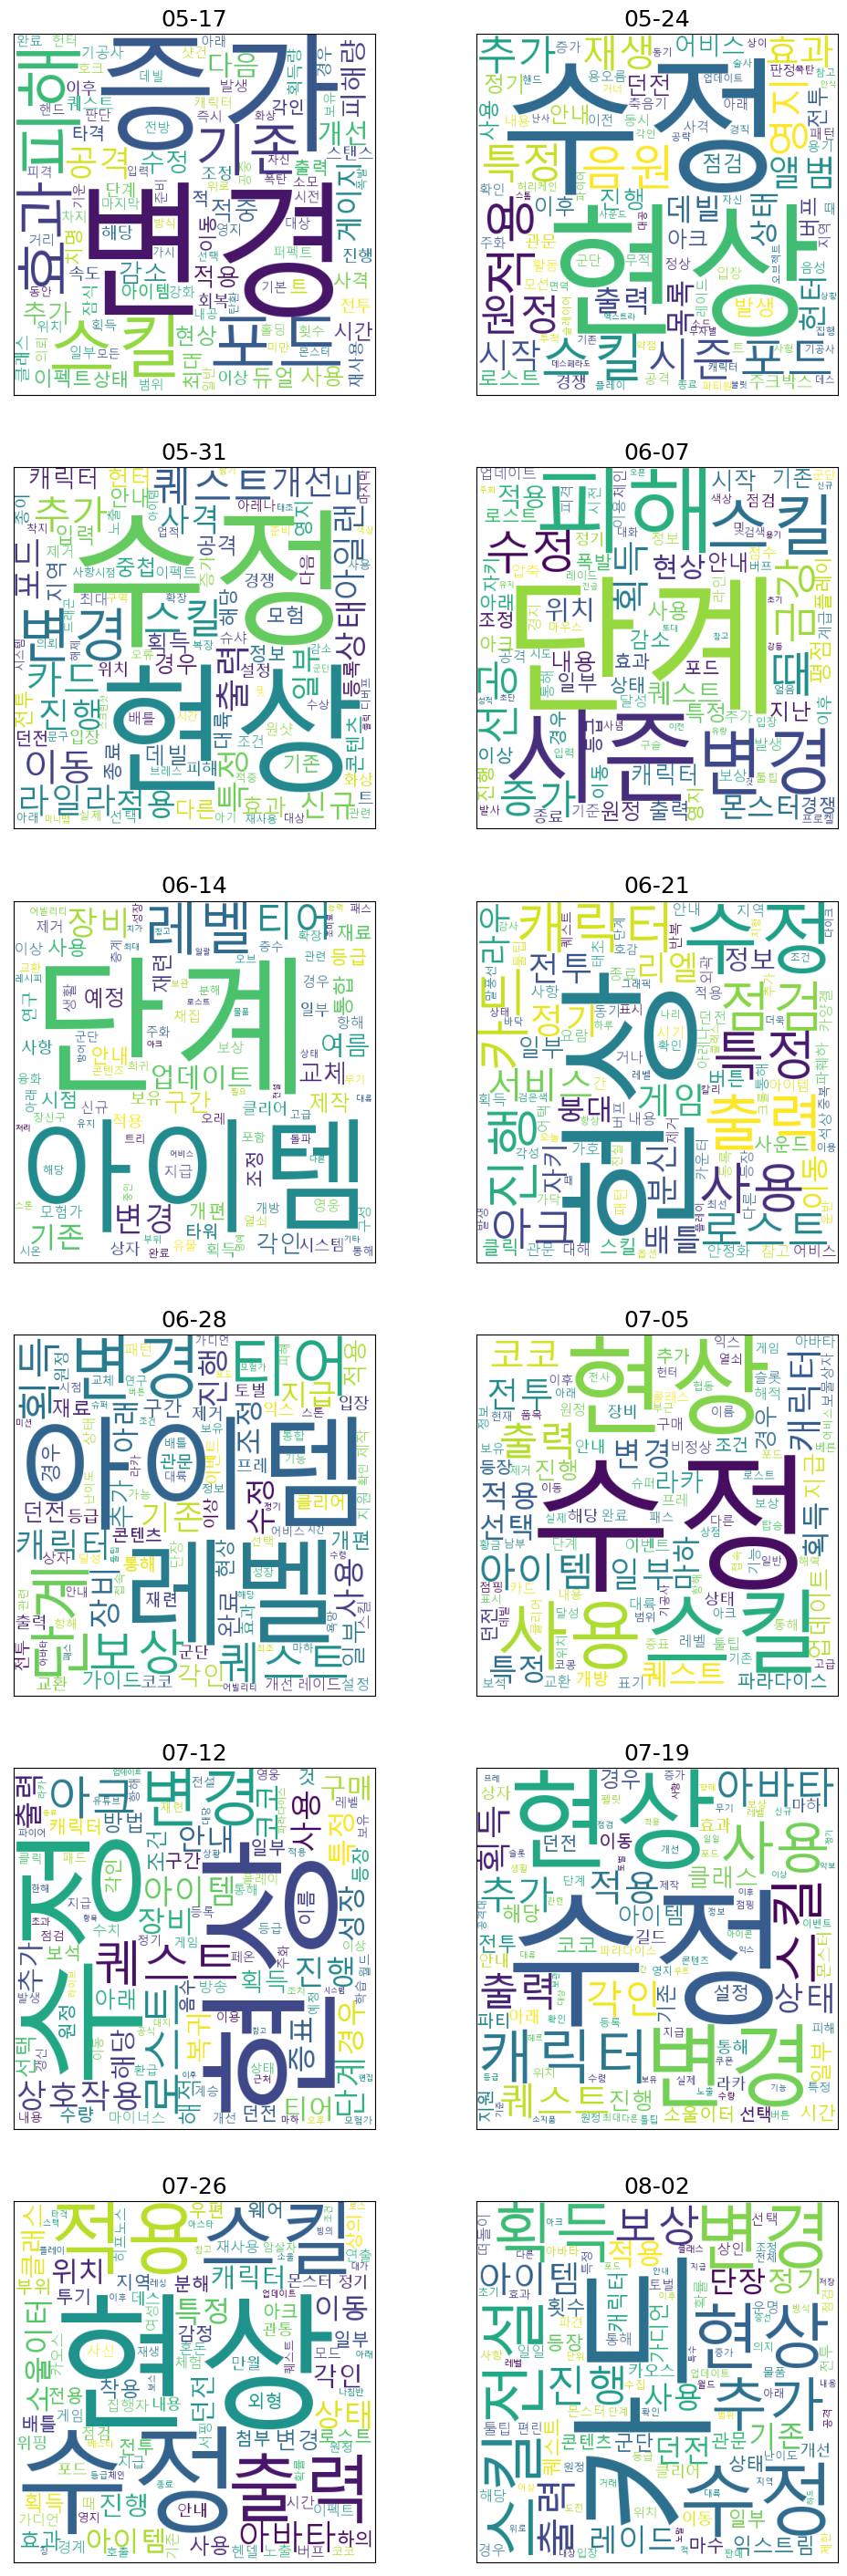

In [46]:
size = 6 # 각 이미지 크기 size*size
row = size * 2
col = size * len(hist_lists)//2 # 6x2로 배치

plt.figure(figsize=(row, col))

for i in range(len(hist_lists)):
    img = pImg.open('./update_history/' + hist_lists[i] + '.png').convert('RGB')

    plt.subplot(size, 2, i+1)
    plt.title(hist_lists[i], fontsize=18)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

#plt.tight_layout()
plt.show()

### 상승/하락 별 업데이트 내역 길이 비교

In [71]:
dfm_up = dfm[dfm['shift(%)'] > 0]
dfm_down = dfm[dfm['shift(%)'] <= 0]
display(dfm_up)
display(dfm_down)

,Title,Date,Link,opening_price,closing_price,shift(%),average
0,5월 17일(수) 업데이트 내역 안내 (내용추가),2023-05-17,https://lostark.game.onstove.com/News/Notice/Views/2405,2930.0,2999.0,2.35,2965.0
3,6월 7일(수) 업데이트 내역 안내,2023-06-07,https://lostark.game.onstove.com/News/Notice/Views/2430,2779.0,2949.0,6.12,2864.0
4,2023 여름 업데이트 시 일부 시스템 변경사항 사전 안내 (내용수정),2023-06-14,https://lostark.game.onstove.com/News/Notice/Views/2437,2949.0,2999.0,1.70,2974.0
7,7월 5일(수) 업데이트 내역 안내 (내용수정),2023-07-05,https://lostark.game.onstove.com/News/Notice/Views/2461,2801.0,2945.0,5.14,2873.0
8,7월 12일(수) 업데이트 내역 안내,2023-07-12,https://lostark.game.onstove.com/News/Notice/Views/2465,2945.0,3540.0,20.20,3243.0
10,7월 26일(수) 업데이트 내역 안내,2023-07-26,https://lostark.game.onstove.com/News/Notice/Views/2483,3411.0,3741.0,9.67,3576.0


,Title,Date,Link,opening_price,closing_price,shift(%),average
1,5월 24일(수) 업데이트 내역 안내,2023-05-24,https://lostark.game.onstove.com/News/Notice/Views/2412,2999.0,2890.0,-3.63,2945.0
2,5월 31일(수) 업데이트 내역 안내,2023-05-31,https://lostark.game.onstove.com/News/Notice/Views/2419,2840.0,2801.0,-1.37,2821.0
5,6월 21일(수) 로스트아크 정기 점검 완료 안내,2023-06-21,https://lostark.game.onstove.com/News/Notice/Views/2441,2999.0,2955.0,-1.47,2977.0
6,6월 28일(수) 업데이트 내역 안내 (7/1 내용 수정),2023-06-28,https://lostark.game.onstove.com/News/Notice/Views/2452,2980.0,2801.0,-6.01,2891.0
9,7월 19일(수) 업데이트 내역 안내 (내용추가),2023-07-19,https://lostark.game.onstove.com/News/Notice/Views/2475,3544.0,3410.0,-3.78,3477.0
11,8월 2일(수) 업데이트 내역 안내 (내용추가),2023-08-02,https://lostark.game.onstove.com/News/Notice/Views/2492,3741.0,2962.0,-20.82,3352.0


In [62]:
hist_up = [str(dfm_up.loc[idx, 'Date'])[5:10] for idx in dfm_up.index]
hist_down = [str(dfm_down.loc[idx, 'Date'])[5:10] for idx in dfm_down.index]
hist_up, hist_down

(['05-17', '06-07', '06-14', '07-05', '07-12', '07-26'],
 ['05-24', '05-31', '06-21', '06-28', '07-19', '08-02'])

In [72]:
up_len, down_len = [], []

for hup in hist_up:
    with open('./update_history/' + hup + '.txt', 'r') as file:
        f = file.read()
        up_len.append(len(f))

for hdown in hist_down:
    with open('./update_history/' + hdown + '.txt', 'r') as file:
        f = file.read()
        down_len.append(len(f))

dfm_up['history_len'] = up_len
dfm_down['history_len'] = down_len

# 직접적으로 dataframe에서 데이터를 수정시 경고 메세지 발생

C:\Users\gabri\AppData\Local\Temp\ipykernel_9904\236591861.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_up['history_len'] = up_len
C:\Users\gabri\AppData\Local\Temp\ipykernel_9904\236591861.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_down['history_len'] = down_len


In [73]:
display(dfm_up)
display(dfm_down)

,Title,Date,Link,opening_price,closing_price,shift(%),average,history_len
0,5월 17일(수) 업데이트 내역 안내 (내용추가),2023-05-17,https://lostark.game.onstove.com/News/Notice/Views/2405,2930.0,2999.0,2.35,2965.0,60209
3,6월 7일(수) 업데이트 내역 안내,2023-06-07,https://lostark.game.onstove.com/News/Notice/Views/2430,2779.0,2949.0,6.12,2864.0,2578
4,2023 여름 업데이트 시 일부 시스템 변경사항 사전 안내 (내용수정),2023-06-14,https://lostark.game.onstove.com/News/Notice/Views/2437,2949.0,2999.0,1.70,2974.0,6908
7,7월 5일(수) 업데이트 내역 안내 (내용수정),2023-07-05,https://lostark.game.onstove.com/News/Notice/Views/2461,2801.0,2945.0,5.14,2873.0,5001
8,7월 12일(수) 업데이트 내역 안내,2023-07-12,https://lostark.game.onstove.com/News/Notice/Views/2465,2945.0,3540.0,20.20,3243.0,2323
10,7월 26일(수) 업데이트 내역 안내,2023-07-26,https://lostark.game.onstove.com/News/Notice/Views/2483,3411.0,3741.0,9.67,3576.0,2518


,Title,Date,Link,opening_price,closing_price,shift(%),average,history_len
1,5월 24일(수) 업데이트 내역 안내,2023-05-24,https://lostark.game.onstove.com/News/Notice/Views/2412,2999.0,2890.0,-3.63,2945.0,1970
2,5월 31일(수) 업데이트 내역 안내,2023-05-31,https://lostark.game.onstove.com/News/Notice/Views/2419,2840.0,2801.0,-1.37,2821.0,5195
5,6월 21일(수) 로스트아크 정기 점검 완료 안내,2023-06-21,https://lostark.game.onstove.com/News/Notice/Views/2441,2999.0,2955.0,-1.47,2977.0,764
6,6월 28일(수) 업데이트 내역 안내 (7/1 내용 수정),2023-06-28,https://lostark.game.onstove.com/News/Notice/Views/2452,2980.0,2801.0,-6.01,2891.0,54137
9,7월 19일(수) 업데이트 내역 안내 (내용추가),2023-07-19,https://lostark.game.onstove.com/News/Notice/Views/2475,3544.0,3410.0,-3.78,3477.0,14307
11,8월 2일(수) 업데이트 내역 안내 (내용추가),2023-08-02,https://lostark.game.onstove.com/News/Notice/Views/2492,3741.0,2962.0,-20.82,3352.0,13951


##### 결론
* 육안으로 봐도 업데이트 내역 길이와 골드 시세가 직접적으로 관련이 있다고 보기 어렵다.

### 상승/하락과 고빈도 단어 비교

In [ ]:
def csv2list(csv_file_path):
    noun_list = []  # 결과를 저장할 리스트

    with open(csv_file_path, 'r', newline='\n', encoding='euc-kr') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')  # 탭으로 구분된 CSV 파일의 경우
        
        for row in reader:
            text = row[0]  # 텍스트 부분
            number = int(row[1])  # 숫자 부분 (정수로 변환)
            noun_list.append((text, number))  # 튜플 형태로 리스트에 추가

    return noun_list


In [75]:
for hu in hist_up:
    nl = csv2list('./update_history/' + hu + '.csv')[:10]
    print(nl)

[('변경', 488), ('증가', 363), ('스킬', 288), ('피해', 285), ('포드', 285), ('효과', 206), ('기존', 195), ('공격', 192), ('게이지', 119), ('피해량', 115)]
[('단계', 17), ('시즌', 12), ('피해', 12), ('변경', 10), ('스킬', 9), ('수정', 9), ('때', 9), ('금강', 8), ('선공', 8), ('증가', 8)]
[('단계', 146), ('아이템', 143), ('레벨', 141), ('티어', 59), ('장비', 38), ('변경', 37), ('기존', 29), ('업데이트', 25), ('여름', 24), ('교체', 22)]
[('수정', 42), ('현상', 40), ('스킬', 29), ('사용', 18), ('아이템', 17), ('출력', 17), ('캐릭터', 14), ('코코', 14), ('전투', 13), ('일부', 13)]
[('현상', 13), ('수정', 11), ('변경', 8), ('퀘스트', 7), ('로스트', 6), ('아크', 6), ('상호작용', 6), ('사용', 6), ('단계', 6), ('아이템', 6)]
[('현상', 25), ('수정', 24), ('스킬', 11), ('적용', 11), ('출력', 11), ('아바타', 11), ('상태', 9), ('소울이터', 8), ('특정', 8), ('이동', 7)]


In [88]:
for hd in hist_down:
    nl2 = csv2list('./update_history/' + hd + '.csv')[:10]
    print(nl2)

[('수정', 20), ('현상', 19), ('스킬', 10), ('적용', 10), ('포드', 8), ('음원', 8), ('시즌', 7), ('특정', 6), ('원정', 6), ('영지', 6)]
[('수정', 34), ('현상', 30), ('변경', 18), ('퀘스트', 16), ('스킬', 16), ('추가', 14), ('카드', 14), ('이동', 13), ('출력', 12), ('라일라', 11)]
[('현상', 7), ('수정', 7), ('출력', 4), ('점검', 3), ('진행', 3), ('사용', 3), ('캐릭터', 3), ('카드', 3), ('특정', 3), ('로스트', 2)]
[('아이템', 300), ('레벨', 261), ('변경', 242), ('티어', 203), ('단계', 187), ('보상', 139), ('퀘스트', 127), ('획득', 122), ('캐릭터', 108), ('기존', 107)]
[('수정', 84), ('현상', 69), ('변경', 47), ('캐릭터', 42), ('사용', 39), ('스킬', 37), ('아바타', 33), ('출력', 31), ('각인', 30), ('추가', 29)]
[('카드', 69), ('수정', 62), ('변경', 51), ('현상', 50), ('전설', 43), ('스킬', 41), ('획득', 40), ('추가', 33), ('보상', 33), ('진행', 31)]


In [80]:
def newfilewrite(path, history):
    with open(path, 'w') as writef: 
        for hist in history:
            with open('./update_history/' + hist + '.txt', 'r') as readf:
                while True:
                    line = readf.readline()
                    if not line:
                        break
                    writef.write(line)

    return path

In [81]:
print(newfilewrite('./update_history/hist_up.txt', hist_up))
print(newfilewrite('./update_history/hist_down.txt', hist_down))

./update_history/hist_up.txt
./update_history/hist_down.txt


#### 상승 고빈도 단어

In [84]:
with open('./update_history/hist_up.txt', 'r', encoding='utf-8') as file:
    f = file.read()

    noun = okt.nouns(f)
    for idx, word in enumerate(noun):
        if len(word) < 2:
            noun.pop(idx)

    count = Counter(noun)
    noun_list_up = count.most_common(100)

print(noun_list_up[:10])

[('변경', 559), ('증가', 371), ('스킬', 337), ('피해', 297), ('포드', 294), ('기존', 235), ('아이템', 217), ('효과', 214), ('단계', 212), ('공격', 195)]


In [117]:
up_dict = {}
for word in noun_list_up[:10]:
    up_dict[word[0]] = []

In [118]:
for word in list(up_dict):
    for hu in hist_up:
        with open('./update_history/' + hu + '.txt', 'r', encoding='utf-8') as file:
            f = file.read()
            up_dict[word].append(f.count(word)) # 내역 별 특정 단어 빈도수

up_dict

{'변경': [493, 10, 37, 11, 8, 5],
 '증가': [363, 8, 0, 0, 0, 0],
 '스킬': [291, 9, 0, 29, 0, 11],
 '피해': [400, 12, 0, 0, 0, 0],
 '포드': [285, 3, 0, 3, 1, 2],
 '기존': [195, 4, 29, 4, 1, 2],
 '아이템': [44, 0, 143, 17, 6, 7],
 '효과': [206, 3, 0, 1, 0, 4],
 '단계': [37, 17, 146, 5, 6, 1],
 '공격': [192, 2, 0, 0, 1, 0]}

In [120]:
dfm_up2 = pd.concat([dfm_up.reset_index(drop=True), pd.DataFrame(up_dict)], axis=1)
dfm_up2

,Title,Date,Link,opening_price,closing_price,shift(%),average,history_len,변경,증가,스킬,피해,포드,기존,아이템,효과,단계,공격
0,5월 17일(수) 업데이트 내역 안내 (내용추가),2023-05-17,https://lostark.game.onstove.com/News/Notice/Views/2405,2930.0,2999.0,2.35,2965.0,60209,493,363,291,400,285,195,44,206,37,192
1,6월 7일(수) 업데이트 내역 안내,2023-06-07,https://lostark.game.onstove.com/News/Notice/Views/2430,2779.0,2949.0,6.12,2864.0,2578,10,8,9,12,3,4,0,3,17,2
2,2023 여름 업데이트 시 일부 시스템 변경사항 사전 안내 (내용수정),2023-06-14,https://lostark.game.onstove.com/News/Notice/Views/2437,2949.0,2999.0,1.70,2974.0,6908,37,0,0,0,0,29,143,0,146,0
3,7월 5일(수) 업데이트 내역 안내 (내용수정),2023-07-05,https://lostark.game.onstove.com/News/Notice/Views/2461,2801.0,2945.0,5.14,2873.0,5001,11,0,29,0,3,4,17,1,5,0
4,7월 12일(수) 업데이트 내역 안내,2023-07-12,https://lostark.game.onstove.com/News/Notice/Views/2465,2945.0,3540.0,20.20,3243.0,2323,8,0,0,0,1,1,6,0,6,1
5,7월 26일(수) 업데이트 내역 안내,2023-07-26,https://lostark.game.onstove.com/News/Notice/Views/2483,3411.0,3741.0,9.67,3576.0,2518,5,0,11,0,2,2,7,4,1,0


#### 하락 고빈도 단어

In [85]:
with open('./update_history/hist_down.txt', 'r', encoding='utf-8') as file:
    f = file.read()

    noun = okt.nouns(f)
    for idx, word in enumerate(noun):
        if len(word) < 2:
            noun.pop(idx)

    count = Counter(noun)
    noun_list_down = count.most_common(100)

print(noun_list_down[:10])

[('변경', 359), ('아이템', 351), ('수정', 292), ('레벨', 277), ('현상', 237), ('단계', 210), ('티어', 205), ('획득', 197), ('퀘스트', 193), ('캐릭터', 184)]


In [121]:
down_dict = {}
for word in noun_list_down[:10]:
    down_dict[word[0]] = []

In [122]:
for word in list(down_dict):
    for hd in hist_down:
        with open('./update_history/' + hd + '.txt', 'r', encoding='utf-8') as file:
            f = file.read()
            down_dict[word].append(f.count(word)) # 내역 별 특정 단어 빈도수

down_dict

{'변경': [1, 18, 0, 243, 47, 51],
 '아이템': [0, 3, 1, 300, 22, 25],
 '수정': [20, 34, 7, 88, 84, 62],
 '레벨': [0, 0, 1, 261, 8, 7],
 '현상': [19, 30, 7, 62, 69, 50],
 '단계': [0, 1, 1, 187, 12, 9],
 '티어': [0, 0, 0, 204, 1, 1],
 '획득': [1, 7, 1, 123, 26, 40],
 '퀘스트': [0, 16, 1, 127, 29, 20],
 '캐릭터': [1, 8, 3, 108, 43, 22]}

In [123]:
dfm_down2 = pd.concat([dfm_down.reset_index(drop=True), pd.DataFrame(down_dict)], axis=1)
dfm_down2

,Title,Date,Link,opening_price,closing_price,shift(%),average,history_len,변경,아이템,수정,레벨,현상,단계,티어,획득,퀘스트,캐릭터
0,5월 24일(수) 업데이트 내역 안내,2023-05-24,https://lostark.game.onstove.com/News/Notice/Views/2412,2999.0,2890.0,-3.63,2945.0,1970,1,0,20,0,19,0,0,1,0,1
1,5월 31일(수) 업데이트 내역 안내,2023-05-31,https://lostark.game.onstove.com/News/Notice/Views/2419,2840.0,2801.0,-1.37,2821.0,5195,18,3,34,0,30,1,0,7,16,8
2,6월 21일(수) 로스트아크 정기 점검 완료 안내,2023-06-21,https://lostark.game.onstove.com/News/Notice/Views/2441,2999.0,2955.0,-1.47,2977.0,764,0,1,7,1,7,1,0,1,1,3
3,6월 28일(수) 업데이트 내역 안내 (7/1 내용 수정),2023-06-28,https://lostark.game.onstove.com/News/Notice/Views/2452,2980.0,2801.0,-6.01,2891.0,54137,243,300,88,261,62,187,204,123,127,108
4,7월 19일(수) 업데이트 내역 안내 (내용추가),2023-07-19,https://lostark.game.onstove.com/News/Notice/Views/2475,3544.0,3410.0,-3.78,3477.0,14307,47,22,84,8,69,12,1,26,29,43
5,8월 2일(수) 업데이트 내역 안내 (내용추가),2023-08-02,https://lostark.game.onstove.com/News/Notice/Views/2492,3741.0,2962.0,-20.82,3352.0,13951,51,25,62,7,50,9,1,40,20,22


### 시세 상승 업데이트 내역과 특정 단어('완화', '추가', '개선', '개편', '신규') 와의 연관성

#### 상승 업데이트 내역

In [127]:
specific_words_up = {'완화':[], '추가':[], '개선':[], '개편':[], '신규':[]}

In [128]:
for word in list(specific_words_up):
    for hu in hist_up:
        with open('./update_history/' + hu + '.txt', 'r', encoding='utf-8') as file:
            f = file.read()
            specific_words_up[word].append(f.count(word)) # 내역 별 특정 단어 빈도수

specific_words_up

{'완화': [4, 0, 0, 1, 0, 0],
 '추가': [94, 2, 1, 7, 4, 0],
 '개선': [109, 0, 0, 0, 2, 0],
 '개편': [2, 0, 13, 0, 0, 0],
 '신규': [10, 1, 6, 0, 0, 0]}

In [129]:
dfm_up3 = pd.concat([dfm_up.reset_index(drop=True), pd.DataFrame(specific_words_up)], axis=1)
dfm_up3

,Title,Date,Link,opening_price,closing_price,shift(%),average,history_len,완화,추가,개선,개편,신규
0,5월 17일(수) 업데이트 내역 안내 (내용추가),2023-05-17,https://lostark.game.onstove.com/News/Notice/Views/2405,2930.0,2999.0,2.35,2965.0,60209,4,94,109,2,10
1,6월 7일(수) 업데이트 내역 안내,2023-06-07,https://lostark.game.onstove.com/News/Notice/Views/2430,2779.0,2949.0,6.12,2864.0,2578,0,2,0,0,1
2,2023 여름 업데이트 시 일부 시스템 변경사항 사전 안내 (내용수정),2023-06-14,https://lostark.game.onstove.com/News/Notice/Views/2437,2949.0,2999.0,1.70,2974.0,6908,0,1,0,13,6
3,7월 5일(수) 업데이트 내역 안내 (내용수정),2023-07-05,https://lostark.game.onstove.com/News/Notice/Views/2461,2801.0,2945.0,5.14,2873.0,5001,1,7,0,0,0
4,7월 12일(수) 업데이트 내역 안내,2023-07-12,https://lostark.game.onstove.com/News/Notice/Views/2465,2945.0,3540.0,20.20,3243.0,2323,0,4,2,0,0
5,7월 26일(수) 업데이트 내역 안내,2023-07-26,https://lostark.game.onstove.com/News/Notice/Views/2483,3411.0,3741.0,9.67,3576.0,2518,0,0,0,0,0


##### 회귀 예측

In [135]:
print(list(dfm_up3)[:7])

['Title', 'Date', 'Link', 'opening_price', 'closing_price', 'shift(%)', 'average']


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [168]:
target = 'shift(%)'

x1 = dfm_up3.drop(list(dfm_up3)[:7], axis=1)
y1 = dfm_up3.loc[:, target]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.1, random_state=1)

In [169]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x1_train, y1_train)

DecisionTreeRegressor(max_depth=5)

In [170]:
y1_pred = pd.Series(model.predict(x1_test))

print("MAE:", mean_absolute_error(y1_test, y1_pred))
# print("R2 score:", r2_score(y1_test, y1_pred)) # 테스트 데이터가 1개라서 경고 발생

MAE: 4.42


In [171]:
print(y1_test)
print(y1_pred)

2    1.7
Name: shift(%), dtype: float64
0    6.12
dtype: float64


#### 하락 업데이트 내역

In [130]:
specific_words_down = {'완화':[], '추가':[], '개선':[], '개편':[], '신규':[]}

In [131]:
for word in list(specific_words_down):
    for hd in hist_down:
        with open('./update_history/' + hd + '.txt', 'r', encoding='utf-8') as file:
            f = file.read()
            specific_words_down[word].append(f.count(word)) # 내역 별 특정 단어 빈도수

specific_words_down

{'완화': [0, 0, 0, 6, 2, 0],
 '추가': [6, 14, 1, 75, 29, 33],
 '개선': [0, 10, 0, 46, 9, 16],
 '개편': [0, 0, 0, 66, 1, 0],
 '신규': [0, 8, 0, 23, 8, 4]}

In [132]:
dfm_down3 = pd.concat([dfm_down.reset_index(drop=True), pd.DataFrame(specific_words_down)], axis=1)
dfm_down3

,Title,Date,Link,opening_price,closing_price,shift(%),average,history_len,완화,추가,개선,개편,신규
0,5월 24일(수) 업데이트 내역 안내,2023-05-24,https://lostark.game.onstove.com/News/Notice/Views/2412,2999.0,2890.0,-3.63,2945.0,1970,0,6,0,0,0
1,5월 31일(수) 업데이트 내역 안내,2023-05-31,https://lostark.game.onstove.com/News/Notice/Views/2419,2840.0,2801.0,-1.37,2821.0,5195,0,14,10,0,8
2,6월 21일(수) 로스트아크 정기 점검 완료 안내,2023-06-21,https://lostark.game.onstove.com/News/Notice/Views/2441,2999.0,2955.0,-1.47,2977.0,764,0,1,0,0,0
3,6월 28일(수) 업데이트 내역 안내 (7/1 내용 수정),2023-06-28,https://lostark.game.onstove.com/News/Notice/Views/2452,2980.0,2801.0,-6.01,2891.0,54137,6,75,46,66,23
4,7월 19일(수) 업데이트 내역 안내 (내용추가),2023-07-19,https://lostark.game.onstove.com/News/Notice/Views/2475,3544.0,3410.0,-3.78,3477.0,14307,2,29,9,1,8
5,8월 2일(수) 업데이트 내역 안내 (내용추가),2023-08-02,https://lostark.game.onstove.com/News/Notice/Views/2492,3741.0,2962.0,-20.82,3352.0,13951,0,33,16,0,4


##### 회귀 예측

In [162]:
target = 'shift(%)'

x2 = dfm_down3.drop(list(dfm_down3)[:7], axis=1)
y2 = dfm_down3.loc[:, target]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.1, random_state=1)

In [163]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x2_train, y2_train)

DecisionTreeRegressor(max_depth=5)

In [166]:
y2_pred = pd.Series(model.predict(x2_test))

print("MAE:", mean_absolute_error(y2_test, y2_pred))
# print("R2 score:", r2_score(y2_test, y2_pred)) # 테스트 데이터가 1개라서 경고 발생

MAE: 2.16


In [165]:
print(y2_test)
print(y2_pred)

2   -1.47
Name: shift(%), dtype: float64
0   -3.63
dtype: float64


### 8/9 예측

In [ ]:
123

## 정리

* 문제점 1) 시세 데이터가 너무 적음. LOSPI 사이트는 OCR을 이용하여 데이터를 수집한다고 함. API로는 불가능. -> 다른 경매장 아이템이라면? 아이템마다 천차만별
* 문제점 2) 업데이트 내역 데이터도 너무 적음. API를 사용해도 가져올 수 있는 제한이 있고 그 이전 데이터는 직접 수집해야 함.
* 문제점 3)

<br>

* 결론 1) 업데이트 내역과 골드 시세는 관련이 있다고 보기 어려움.